In [1]:
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.tools.monitor import job_monitor
import matplotlib as mpl
# import basic plot tools
from qiskit.visualization import plot_histogram

# For particular input

In [2]:
bv_circuit=QuantumCircuit(4,3)
#bv_circuit.clear()

In [3]:
bit_string=('111')

In [4]:
bv_circuit.x(3)
bv_circuit.h([0,1,2,3])
bv_circuit.barrier()
bv_circuit.cx(0,3)
bv_circuit.cx(1,3)
bv_circuit.cx(2,3)
bv_circuit.barrier()
bv_circuit.h([0,1,2,3])
bv_circuit.measure([0,1,2],[0,1,2])


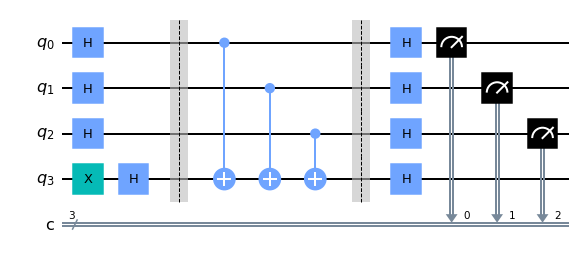

In [5]:
bv_circuit.draw('mpl')

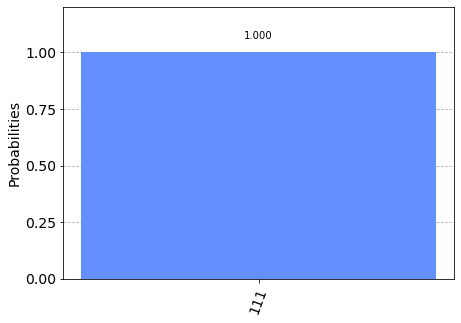

In [6]:
aer_sim = Aer.get_backend('aer_simulator')   #Local Simulator
shots = 1024                                 #No. of times the circuit is running
qobj = assemble(bv_circuit, shots = shots) 
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)                      #Plotting the result

# For general bit string

In [7]:
bit_string=('1010')

In [8]:
bv_circuit=QuantumCircuit(len(bit_string)+1,len(bit_string))
bv_circuit.clear()


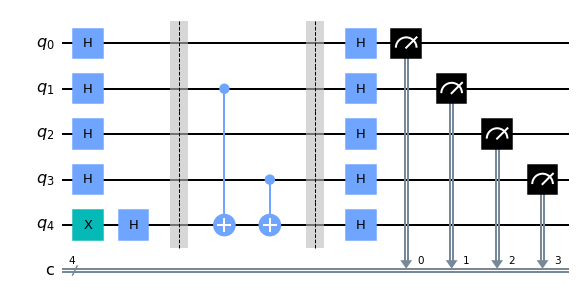

In [9]:
#bv_circuit.x(len(bit_string))
bv_circuit.h(range(len(bit_string)))
bv_circuit.x(len(bit_string))
bv_circuit.h(len(bit_string))
bv_circuit.barrier()

for i, yes in enumerate(reversed(bit_string)):
        if yes=='1':
            bv_circuit.cx(i,len(bit_string))
            
bv_circuit.barrier()
bv_circuit.h(range(len(bit_string)))
bv_circuit.h(len(bit_string))
      
bv_circuit.measure(range(len(bit_string)),range(len(bit_string)))

bv_circuit.draw('mpl')

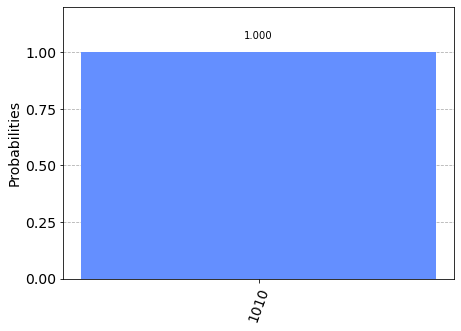

In [10]:
aer_sim = Aer.get_backend('aer_simulator')   #Local Simulator
shots = 1024                                 #No. of times the circuit is running
qobj = assemble(bv_circuit, shots = shots) 
results = aer_sim.run(qobj).result()
counts = results.get_counts()
plot_histogram(counts)                      #Plotting the result